## Final Project Submission

Please fill out:
* Student name: MUTHAMA BRIAN MUTAVA
* Student pace: Full time
* Scheduled project review date/time: 03/22/2024 @ 1600HRS
* Instructor name: ASHA DEEN
* Blog post URL:


# Exploratory Data Analysis for Microsoft's Movie Studio

## Overview

This data analysis project aims to explore the world of movies to uncover insights that will aid Microsoft in establishing its own movie studio. By analyzing various datasets, this project seeks to understand the factors contributing to the success of movies at the box office. The analysis will focus on exploring trends, patterns, and relationships within the data to inform strategic decisions regarding movie production and distribution.

## Business Understanding

Microsoft is venturing into the movie industry with the intention of establishing its own movie studio. To ensure the success of this venture, it is essential to have a comprehensive understanding of the movie market landscape. By analyzing data from multiple sources, this project aims to address key questions such as:
- What genres of movies are currently performing well at the box office?
- How do critical and audience ratings impact the commercial success of movies?
- Are there specific production budgets associated with higher box office earnings?
- What are the potential risks and challenges in the movie industry that Microsoft should consider?

By answering these questions, this project aims to provide actionable insights that will guide Microsoft in making informed decisions regarding movie production strategies, target audiences, and marketing approaches.

## Data Understanding

Access to several datasets containing movie-related information, including:
- tmdb.movies.csv: Contains metadata about movies, including titles, genres, and release dates.
- bom.movies_gross.csv: Provides data on movie gross revenue and box office performance.
- im.db: A SQLite database containing detailed information about movies, including ratings, cast, and crew.
- rt.movie_info.tsv and rt.reviews.tsv: Include information about movies and reviews from Rotten Tomatoes.
- tn.movie_budgets.csv: Contains data on movie budgets and financial performance.

The analysis will involve exploring and cleaning these datasets to extract relevant insights. Techniques such as data visualization and statistical analysis will be utilized to uncover patterns and relationships within the data, providing valuable insights for Microsoft's movie studio venture.

# Import Libraries

The following cell imports essential libraries required for data manipulation, analysis, and visualization. These libraries include:




In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

# Setting up matplotlib to display graphs inline in the notebook
%matplotlib inline


Connected to the IMDb database using the sqlite3 module and loaded the im.db file to examine its contents. Displayed the tables present in the database.


In [12]:


# Specify the correct path to the IMDb database directory
db_path = r'C:\Users\HP\Documents\GitHub\phase-1-project\zippedData\im.db\im.db'

# Connect to the IMDb database
conn = sqlite3.connect(db_path)

# Retrieve the list of tables in the database
tables = pd.read_sql("""
                    SELECT name FROM sqlite_master WHERE type='table';
                    """, conn)

# Display the tables
tables












,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


Wrote a SQL query that selects all columns (*) from both the movie_basics table (aliased as mb) and the movie_ratings table (aliased as mr). The JOIN keyword is used to combine the two tables based on the movie_id column, which is common to both tables. The result of the query is then fetched into a Pandas DataFrame named result.

In [5]:
# Define the SQL query to join the 'movie_basics' and 'movie_ratings' tables on 'movie_id'
sql_query = '''
SELECT mb.*, mr.*
FROM movie_basics mb
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id;
'''

# Execute the SQL query and fetch the results into a Pandas DataFrame
result = pd.read_sql_query(sql_query, conn)
result




,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5


# Data Cleaning Process for IMDB:

# Step 1: Handled Missing Values
# - Filled missing values in the 'runtime_minutes' column with the median value to maintain central tendency.
# - Dropped rows with missing values in the 'genres' column as it was essential for our analysis.

# Step 2: Removed Duplicates
# - Removed duplicate rows to ensure each movie entry was unique.

# Step 3: Corrected Data Types
# - Converted 'start_year' to integer and 'runtime_minutes' to float for consistency and analysis purposes.




In [6]:
# Fill missing values in 'runtime_minutes' column with the median
median_runtime = result['runtime_minutes'].median()
result['runtime_minutes'].fillna(median_runtime, inplace=True)

# Drop rows with missing values in 'genres' column
result.dropna(subset=['genres'], inplace=True)

# Remove duplicate rows
result.drop_duplicates(inplace=True)

# Convert 'start_year' to integer
result['start_year'] = result['start_year'].astype(int)

# Convert 'runtime_minutes' to float
result['runtime_minutes'] = result['runtime_minutes'].astype(float)

# Display the cleaned dataset
result.head()
result.tail()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,tt9913056,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,91.0,Documentary,tt9914642,8.5,8
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,tt9916160,6.5,11


# Exploring the Distribution of Movie Ratings and Number of Votes

"""
To gain insights into the overall sentiment and popularity of movies in the dataset, 
we will visualize the distribution of movie ratings and the number of votes each movie has received.

Steps:
1. Retrieve the necessary columns from the DataFrame: 'averagerating' and 'numvotes'.
2. Plot histograms to visualize the distribution of ratings and number of votes.
3. Analyze the distribution patterns to understand the overall sentiment and popularity of movies.
"""


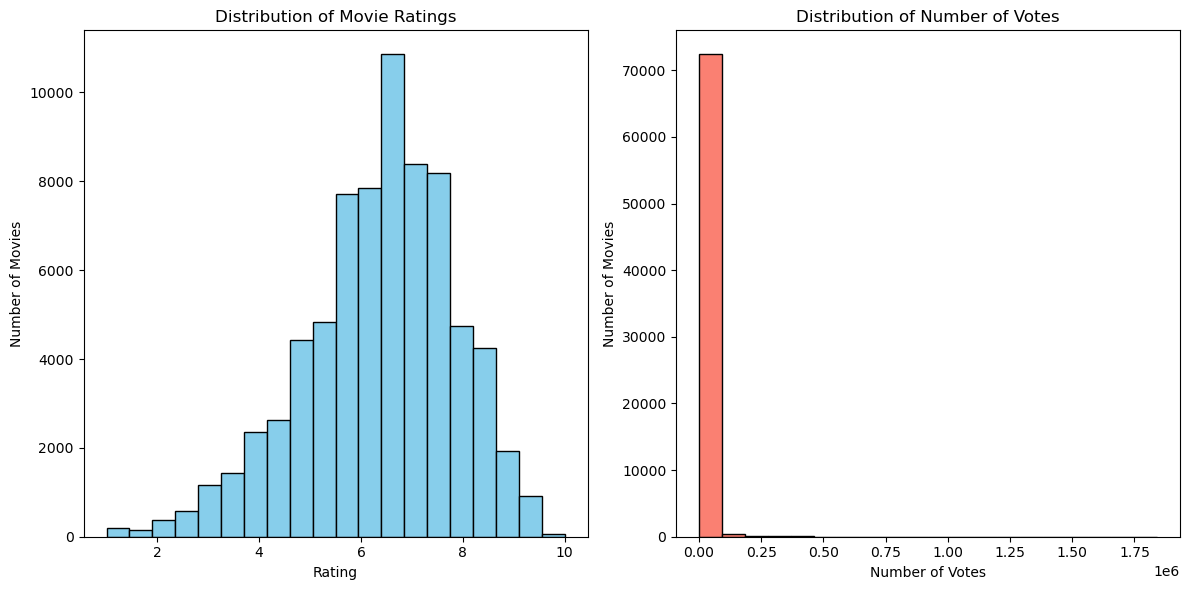

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot histogram for movie ratings
axes[0].hist(result['averagerating'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Movie Ratings')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Number of Movies')

# Plot histogram for number of votes
axes[1].hist(result['numvotes'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Number of Votes')
axes[1].set_xlabel('Number of Votes')
axes[1].set_ylabel('Number of Movies')


# Display the plots
plt.tight_layout()
plt.show()

# Observations from the Histograms:

# Average Rating Distribution:
# - The majority of movies have average ratings clustered around 6.33
# - There are some movies with exceptionally high ratings, possibly above 7.4, and a few with very low ratings, likely below 5.5.
# - The distribution appears slightly skewed, with most movies concentrated around the average rating.

# Popularity Distribution:
# - Most movies have a relatively low number of votes, with many clustered towards the lower end of the vote count scale (e.g., below 289).
# - However, there are a few standout movies that have garnered a significantly higher number of votes, possibly exceeding 100,000.
# - The distribution shows a clear right skew, indicating that a small number of movies attract a disproportionately high number of votes compared to the rest of the dataset.


# Counting the occurrences of each genre in the dataset to identify the most popular genres
# By examining the frequency of different genres, we can identify which genres are most prevalent
# and potentially explore trends in audience preferences.


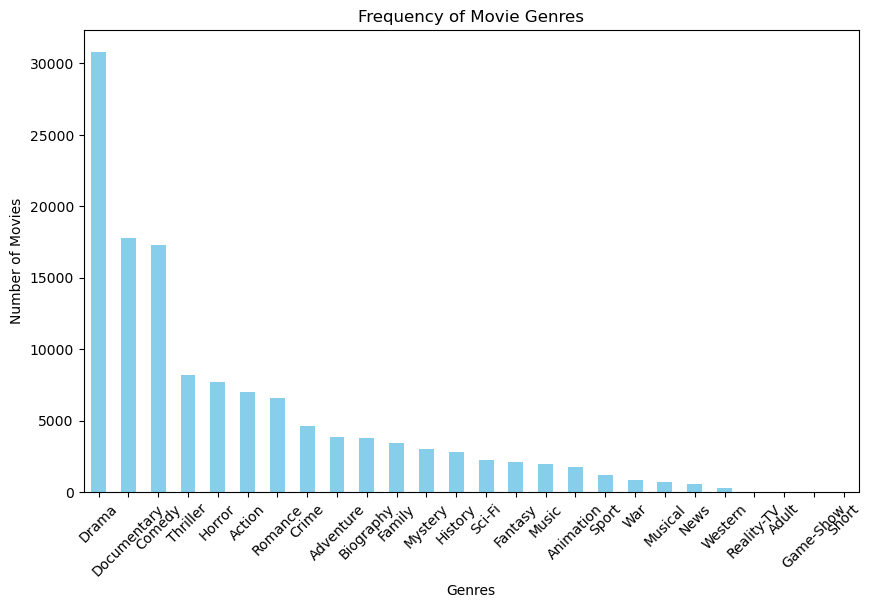

In [8]:
# Count the frequency of each genre
genre_counts = result['genres'].str.split(',', expand=True).stack().value_counts()

# Plot the frequency of genres
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


# Interpretation of genre frequency counts:
# The top three most frequent genres are Drama, Documentary, and Comedy, with Drama being the most prevalent genre by a significant margin.
# Thriller, Horror, and Action follow as the next most common genres, indicating a preference for genres with elements of suspense and action.
# Romance, Crime, and Adventure also appear frequently, suggesting a diverse range of audience interests.
# Genres such as War, Musical, News, Western, Reality-TV, Adult, Game-Show, and Short are among the least common, indicating niche or specialized genres.

# Counting the occurrences of each genre in relation to the number of votes received
# This analysis aims to identify the popularity of genres based on the number of votes they receive
# and explore potential correlations between genre popularity and audience engagement.


In [9]:
# Exploding the 'genres' column to create separate rows for each genre
exploded_genres = result['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genre')

# Merging the exploded genres with the original DataFrame
result_expanded = result.drop('genres', axis=1).join(exploded_genres)

# Grouping the data by genre and computing the mean number of votes for each genre
genre_votes_mean = result_expanded.groupby('genre')['numvotes'].mean()

# Sorting the genres by the mean number of votes in descending order
sorted_genre_votes_mean = genre_votes_mean.sort_values(ascending=False)

# Displaying the top 10 genres with the highest mean number of votes
top_genres_with_votes = sorted_genre_votes_mean.head(10)
top_genres_with_votes



genre
Adventure    22067.746660
Sci-Fi       19474.292384
Action       14476.485690
Fantasy      12387.443086
Animation     8808.549627
Western       8758.485714
Crime         8594.959011
Mystery       8113.618295
Thriller      5860.449434
Biography     5673.259648
Name: numvotes, dtype: float64

# Comparison of Genre Frequency Counts with Mean Number of Votes:
# 
# Adventure and Sci-Fi, which are not the most frequent genres, exhibit the highest mean number of votes. This suggests that while these genres may not be the most prevalent in terms of the total number of movies produced, they tend to attract a highly engaged audience.
# 
# Conversely, Drama, Documentary, and Comedy, which are the most frequent genres, do not appear among the top genres with the highest mean number of votes. This indicates that although these genres are popular in terms of the sheer quantity of movies produced, they may not always receive as much viewer engagement or attention compared to other genres.
# 
# Thriller and Action genres show a strong presence in both frequency counts and mean number of votes. This suggests that movies in these genres tend to not only be produced frequently but also receive a significant level of audience engagement, indicating a consistent interest from viewers.
# 
# Fantasy and Western genres, although among the least frequent, still demonstrate a notable level of mean number of votes. This indicates that despite being less common in terms of movie production, these genres continue to attract attention and engagement from viewers.
# 
# Other genres such as War, Musical, News, Reality-TV, Adult, Game-Show, and Short, which rank among the least frequent genres, also tend to receive lower mean number of votes. This suggests that while these genres may cater to specific interests or demographics, they may not attract as broad an audience or level of engagement compared to more mainstream genres.


# Created a line plot for visualizing trends over time, thus 
# making it suitable for analyzing the distribution of movies over the years based on their start year.



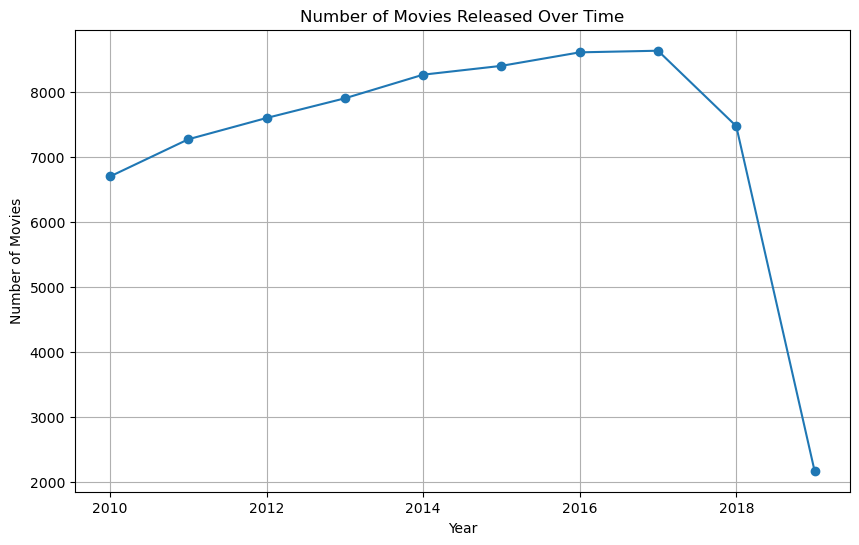

In [10]:
# Code cell to generate the Line Plot for trend over time (start year)

# Importing necessary libraries
import matplotlib.pyplot as plt

# Grouping the data by start year and counting the number of movies for each year
movies_per_year = result.groupby('start_year').size()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', linestyle='-')
plt.title('Number of Movies Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


Interpretation of the Line Plot:
# The line plot shows that the number of movies released over time has increased gradually from 2010, peaking around 2017.
# However, post-2017, there is a sharp decline in the number of movies released, with the rate of decline steepening after 2018.
# This trend suggests a potential saturation in the market or a shift in the film industry, possibly influenced by factors such as changing audience preferences, economic conditions, or industry regulations.
# For stakeholders in the film industry, this insight highlights the importance of adapting to evolving market trends and identifying new opportunities for growth or innovation.

Next, the bom.movie_gross.csv database file was loaded

In [14]:
# Let's start by loading the provided CSV file to understand its structure and contents

db_path2 = r'C:\Users\HP\Documents\GitHub\phase-1-project\zippedData\bom.movie_gross.csv\bom.movie_gross.csv' 
# Load the dataset
bom_df = pd.read_csv(db_path2)

# Display the first few rows of the dataframe to understand its structure and contents
bom_df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


The dataset bom.movie_gross.csv consists of the following columns:

title: The title of the movie.
studio: The studio that produced the movie.
domestic_gross: Gross domestic earnings in USD.
foreign_gross: Gross foreign earnings. This appears to be a string, which might require conversion to numeric values for analysis.
year: The release year of the movie.

Data Cleaning:

Check and handle missing values in domestic_gross, foreign_gross, and other relevant columns.
Convert foreign_gross to a numeric data type, as it appears to be in string format which might be due to the presence of commas or other non-numeric characters.

In [16]:
# Data Cleaning

# Step 1: Check for missing values in the dataset
missing_values = bom_df.isnull().sum()

# Step 2: Convert 'foreign_gross' to numeric values, ensuring non-numeric characters are handled appropriately
# First, let's remove commas if present and then convert the column to float
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(',', '')
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'], errors='coerce')

# Display the count of missing values after initial cleaning steps
missing_values_after_cleaning = bom_df.isnull().sum()

(missing_values, missing_values_after_cleaning)


(title                0
 studio               5
 domestic_gross      28
 foreign_gross     1350
 year                 0
 dtype: int64,
 title                0
 studio               5
 domestic_gross      28
 foreign_gross     1350
 year                 0
 dtype: int64)

Before Cleaning:

The studio column has 5 missing values.
The domestic_gross column has 28 missing values.
The foreign_gross column had 1,350 missing or non-numeric values which could not be converted directly.
After Cleaning:

The conversion of foreign_gross to numeric was successful, but the count of missing values remained the same, indicating that these were likely missing before conversion. No additional missing values were introduced during this step.
Given the presence of missing values, especially in the foreign_gross column, we might consider the following steps for handling missing data:

Next, let's proceed with obtaining descriptive statistics for the numerical columns and visualizing the distribution of movie earnings. ​​



,domestic_gross,foreign_gross,year
count,3.359000e+03,2.037000e+03,3387.000000
mean,2.874585e+07,7.487281e+07,2013.958075
std,6.698250e+07,1.374106e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.700000e+06,2012.000000
50%,1.400000e+06,1.870000e+07,2014.000000
75%,2.790000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


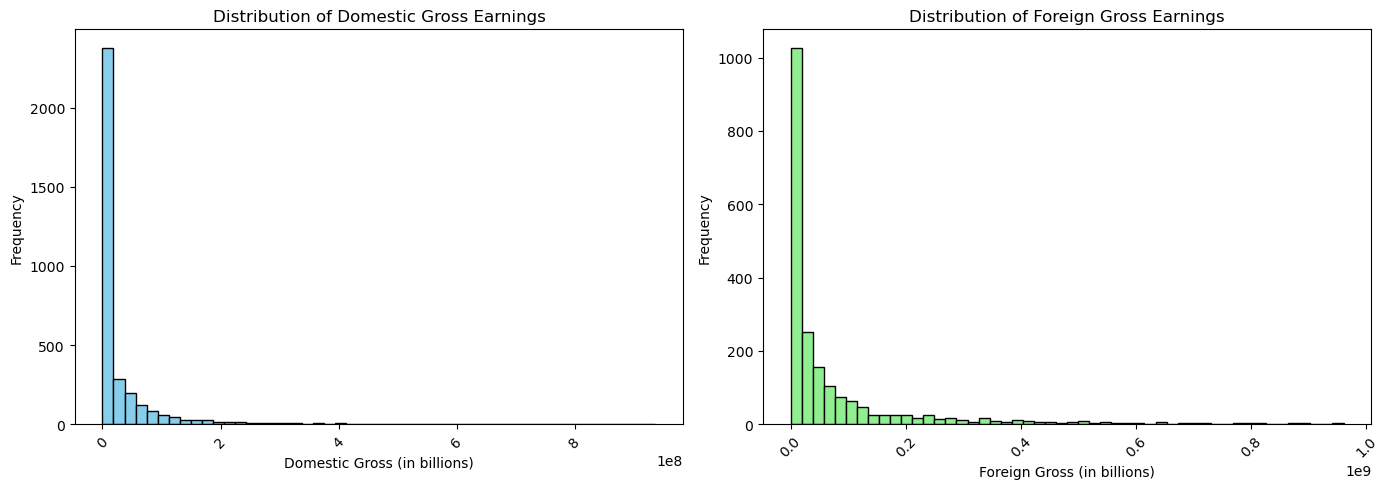

In [18]:
# Descriptive Statistics
descriptive_stats = bom_df.describe()

# Visualize the distribution of domestic and foreign gross earnings using histograms
# We'll use matplotlib for plotting the histograms
import matplotlib.pyplot as plt

# Setting up the figure and axes for two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for domestic_gross
ax[0].hist(bom_df['domestic_gross'].dropna(), bins=50, color='skyblue', edgecolor='black')
ax[0].set_title('Distribution of Domestic Gross Earnings')
ax[0].set_xlabel('Domestic Gross (in billions)')
ax[0].set_ylabel('Frequency')
ax[0].tick_params(axis='x', rotation=45)

# Histogram for foreign_gross
ax[1].hist(bom_df['foreign_gross'].dropna(), bins=50, color='lightgreen', edgecolor='black')
ax[1].set_title('Distribution of Foreign Gross Earnings')
ax[1].set_xlabel('Foreign Gross (in billions)')
ax[1].set_ylabel('Frequency')
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display descriptive statistics
descriptive_stats


Descriptive Statistics Overview:
The dataset contains movies from years 2010 to 2018.
Domestic Gross Earnings:
The mean domestic gross earning is approximately $28.7 million, with a significant standard deviation of $67 million, indicating a wide variance in earnings.
The minimum domestic gross earning is $100, and the maximum is $936.7 million.
Foreign Gross Earnings:
The mean foreign gross earning is approximately $74.9 million, higher on average than domestic gross, with a standard deviation of $137.4 million.
The minimum foreign gross earning recorded is $600, and the maximum is $960.5 million.
Histogram Insights:
Both domestic and foreign gross earnings are heavily right-skewed, indicating that a majority of movies earn relatively lower revenues, with a few outliers achieving exceptionally high earnings.
The distributions suggest that while there are blockbuster hits that perform extraordinarily well in both domestic and foreign markets, most movies do not reach these high levels of financial success.
Given the skewness in the data, further analysis could explore:

The top-performing movies in terms of domestic and foreign gross earnings.
The relationship between domestic and foreign gross earnings to understand if movies that perform well domestically also tend to do well in foreign markets.

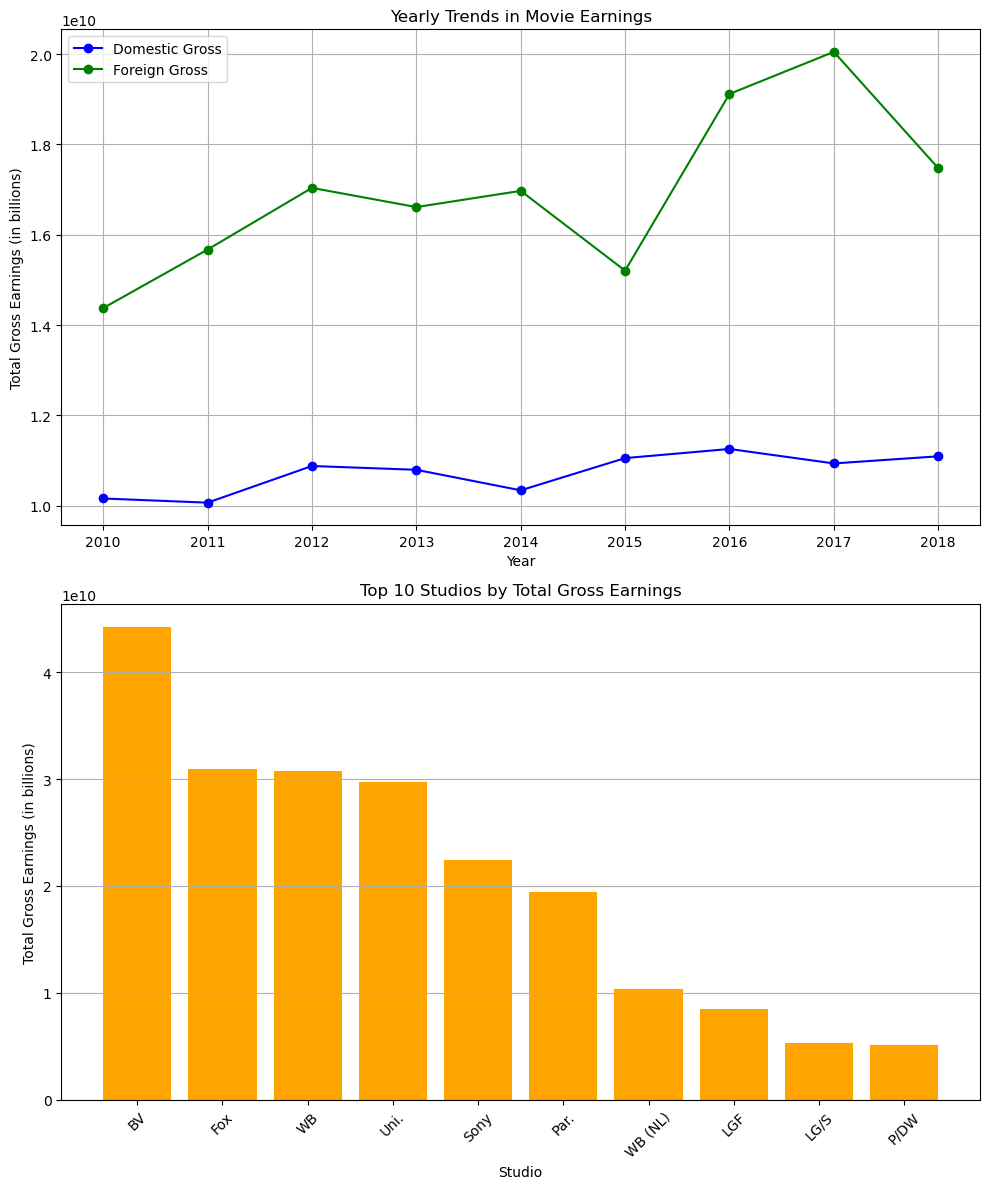

In [27]:
# Yearly Trends in Movie Earnings
# We will aggregate domestic and foreign gross earnings by year to observe trends over time.
yearly_trends = bom_df.groupby('year').agg({
    'domestic_gross': 'sum',
    'foreign_gross': 'sum'
}).reset_index()


# Studio Performance
# Let's look at the performance of different studios in terms of total gross earnings (domestic + foreign).
bom_df['total_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']
studio_performance = bom_df.groupby('studio').agg({
    'total_gross': 'sum'
}).reset_index().sort_values(by='total_gross', ascending=False).head(10)

#Setting up the figure and axes for the plots
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plot for Yearly Trends in Movie Earnings
ax[0].plot(yearly_trends['year'], yearly_trends['domestic_gross'], label='Domestic Gross', marker='o', color='blue')
ax[0].plot(yearly_trends['year'], yearly_trends['foreign_gross'], label='Foreign Gross', marker='o', color='green')
ax[0].set_title('Yearly Trends in Movie Earnings')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Total Gross Earnings (in billions)')
ax[0].legend()
ax[0].grid(True)

# Bar chart for Top 10 Studios by Total Gross Earnings
ax[1].bar(studio_performance['studio'], studio_performance['total_gross'], color='orange')
ax[1].set_title('Top 10 Studios by Total Gross Earnings')
ax[1].set_xlabel('Studio')
ax[1].set_ylabel('Total Gross Earnings (in billions)')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()



Yearly Trends in Movie Earnings:
Both domestic and foreign gross earnings have shown fluctuations over the years, with foreign gross generally exceeding domestic gross earnings, especially in the later years.
A notable increase in foreign gross earnings is observed around 2016 and 2017, suggesting an expanding international market for movies during these years.

Top 10 Studios by Total Gross Earnings:
The studio with the highest total gross earnings is BV (Disney), followed by Fox, WB (Warner Bros.), and Uni. (Universal). These studios dominate in terms of box office earnings, showcasing their significant impact on the movie industry.
The visualization highlights the disparity in total gross earnings among studios, with the top studios significantly outperforming others.

Next let's start by loading the rt.reviews TSV file to understand its structure and contents.
# Since it's a TSV file, we'll use the sep='\t' parameter to properly read the file.

In [31]:
# Load the dataset
db_path3 = r'C:\Users\HP\Documents\GitHub\phase-1-project\zippedData\rt.reviews.tsv\rt.reviews.tsv'
rt_reviews_df = pd.read_csv(db_path3, sep='\t', encoding='latin1')

# Display the first few rows of the dataframe to understand its structure and contents
rt_reviews_df.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


Data Cleaning:

Check and handle missing values, especially in critical columns like review, rating, and fresh.
Analyze the format of the rating column and standardize it if necessary, as it seems to vary and might not be consistent across all entries.

In [32]:
# Data Cleaning

# Step 1: Check for missing values in the dataset
missing_values_initial = rt_reviews_df.isnull().sum()

# Step 2: Explore the 'rating' column to understand its format and variations
unique_ratings = rt_reviews_df['rating'].unique()

# Since the 'rating' column has various formats, let's see a sample of these to determine how we might standardize them
rating_samples = unique_ratings[:10]

(missing_values_initial, rating_samples)


(id                0
 review         5563
 rating        13517
 fresh             0
 critic         2722
 top_critic        0
 publisher       309
 date              0
 dtype: int64,
 array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4'],
       dtype=object))

The dataset contains a significant number of missing values in several columns:
review: 5,563 missing values, indicating that many entries do not have the review text available.
rating: 13,517 missing values, suggesting that not all reviews include a specific rating.
critic: 2,722 missing values, meaning some reviews are not attributed to a named critic.
publisher: 309 missing values, indicating a small proportion of reviews lack publisher information.
No missing values are found in the fresh, id, top_critic, and date columns.

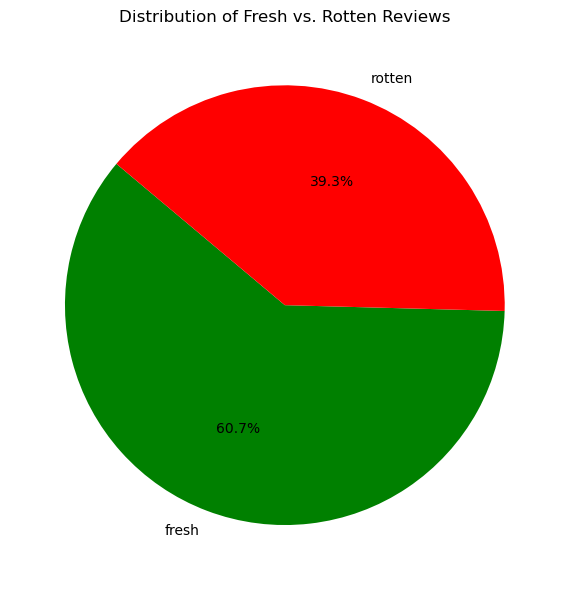

(fresh
 fresh     33035
 rotten    21397
 Name: count, dtype: int64,
 top_critic
 0    41336
 1    13096
 Name: count, dtype: int64,
 date
 1800    4
 1951    2
 1953    1
 1958    1
 1965    1
 Name: count, dtype: int64)

In [67]:
# Descriptive Statistics and Visualization Preparation

# Distribution of 'fresh' vs. 'rotten' reviews
fresh_rotten_distribution = rt_reviews_df['fresh'].value_counts()

# Count of reviews by top critics
top_critic_reviews = rt_reviews_df['top_critic'].value_counts()

# Convert 'date' to datetime format for time-based analysis
rt_reviews_df['date'] = pd.to_datetime(rt_reviews_df['date'], errors='coerce')

# Reviews over time - we will count the number of reviews by year for visualization
reviews_over_time = rt_reviews_df['date'].dt.year.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(6, 6))

# Pie chart for 'fresh' vs. 'rotten' distribution
ax.pie(fresh_rotten_distribution, labels=fresh_rotten_distribution.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
ax.set_title('Distribution of Fresh vs. Rotten Reviews')

plt.tight_layout()
plt.show()

(fresh_rotten_distribution, top_critic_reviews, reviews_over_time.head())


Distribution of Fresh vs. Rotten Reviews:
Fresh Reviews: 33,035 (representing the majority of reviews)
Rotten Reviews: 21,397
The pie chart shows that a larger proportion of reviews are categorized as "fresh," indicating a general positive sentiment towards movies in this dataset.
Top Critic Reviews:
Non-Top Critics: 41,336 reviews
Top Critics: 13,096 reviews
This distribution highlights that a significant portion of reviews comes from critics not designated as top critics, suggesting a wide range of perspectives in the dataset.

# In order for us to conduct a comprehensive review, let's start explore tn.movie_budgets database file by loading the CSV file to understand its structure and contents.



In [53]:
db_path4 = r'C:\Users\HP\Documents\GitHub\phase-1-project\zippedData\tn.movie_budgets.csv\tn.movie_budgets.csv'
# Load the dataset
tn_movie_budgets_df = pd.read_csv(db_path4)

# Display the first few rows of the dataframe to understand its structure and contents
tn_movie_budgets_df.info()
tn_movie_budgets_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Data Analysis:
Since there are no apparent missing values, the next logical step is to explore the data so as to understand it.



In [70]:


tn_movie_budgets_df = tn_movie_budgets_df.sort_values(by=['worldwide_gross','domestic_gross','production_budget'],ascending=[False,False,True])
h = tn_movie_budgets_df.head()
d = tn_movie_budgets_df.describe()
h, d





(    id  release_date                                 movie  production_budget  \
 0    1  Dec 18, 2009                                Avatar        425000000.0   
 42  43  Dec 19, 1997                               Titanic        200000000.0   
 5    6  Dec 18, 2015  Star Wars Ep. VII: The Force Awakens        306000000.0   
 6    7  Apr 27, 2018                Avengers: Infinity War        300000000.0   
 33  34  Jun 12, 2015                        Jurassic World        215000000.0   
 
     domestic_gross  worldwide_gross  
 0      760507625.0     2.776345e+09  
 42     659363944.0     2.208208e+09  
 5      936662225.0     2.053311e+09  
 6      678815482.0     2.048134e+09  
 33     652270625.0     1.648855e+09  ,
                 id  production_budget  domestic_gross  worldwide_gross
 count  5782.000000       5.782000e+03    5.782000e+03     5.782000e+03
 mean     50.372363       3.158776e+07    4.187333e+07     9.148746e+07
 std      28.821076       4.181208e+07    6.824060e+07 

Descriptive Statistics Overview:
The dataset comprises 5,782 movies with details on their budgets, gross earnings, and profits.
Production Budget:
Mean budget: $31.6 million
Range: $1,100 to $425 million, indicating a wide variance in movie budgets.
Gross Earnings (Domestic and Worldwide):
Mean domestic gross: $41.9 million
Mean worldwide gross: $91.5 million
These figures suggest that, on average, movies tend to earn significantly more on a worldwide scale than domestically.
Profit and Profit Margins:
Mean domestic profit: $10.3 million
Mean worldwide profit: $60 million
Profit margins have a wide range, with some values being negative (indicating losses) and others showing high profitability. The presence of -inf in profit margins indicates movies with zero gross earnings, resulting in undefined profit margins.

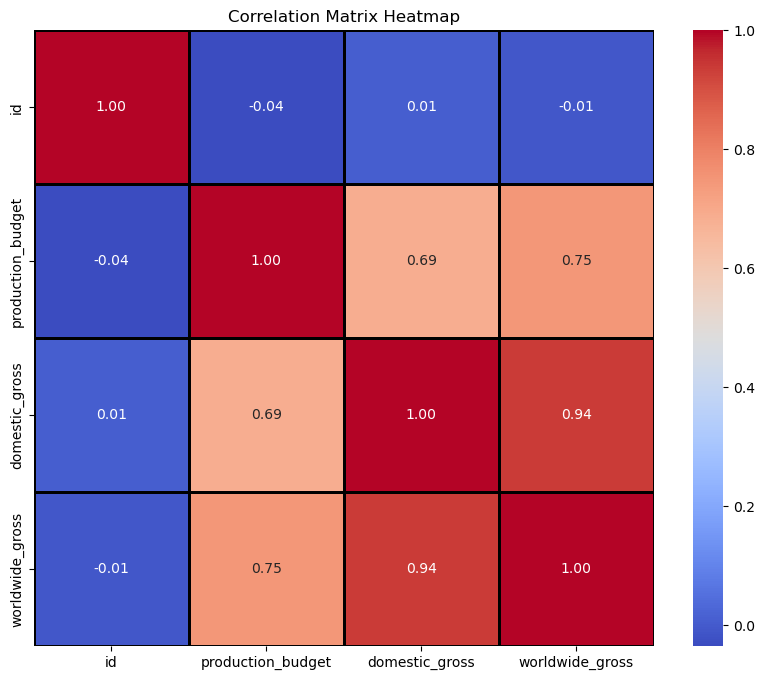

In [66]:
# Select only numeric columns for the correlation matrix
numeric_df = tn_movie_budgets_df.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix from the numeric DataFrame
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2, linecolor='black')
plt.title('Correlation Matrix Heatmap')
plt.show()


# The correlation matrix for the dataset shows the relationships between different financial aspects of movies.
# 'id' has very low correlation with all other numerical columns, indicating it's just an identifier without meaningful financial insight.
# 'production_budget' shows strong positive correlations with both 'domestic_gross' (0.69) and 'worldwide_gross' (0.75), suggesting that higher budgets are generally associated with higher gross earnings.
# The correlation between 'domestic_gross' and 'worldwide_gross' is very high (0.94), indicating that movies that do well domestically tend to also perform well worldwide.
# These correlations highlight the importance of investment in production quality and potential global appeal in achieving financial success in the movie industry.
